#  Keras

Author: __Thanchanok Phuawiriyakul 24582239__

        AT3 - Data Product with Machine 
In this experiment, we will train the model using Keras to predict the total fares.


__Table of contents__
1. [Load dataset](#load-dataset)
2. [Train Keras](#Train-keras )
3. [Keras tuner](#Keras-Tuner)
4. [Conclusion]()
5. [Reference]()

In [1]:
# first neural network with keras tutorial
import numpy as np
import tensorflow as tf
import keras
import sys
import pandas as pd
import keras_tuner
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

/Users/baiporthn/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Using TensorFlow backend


In [2]:
sys.path.append('../../src')

## Load dataset

In [3]:
from data.make_dataset import *
X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='../../data/processed/')

## Train keras

In [37]:
# define the keras model
model = keras.Sequential()
model.add(Dense(units=12, input_shape=(12,), activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [39]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
253500/253500 [==============================] - 97s 381us/step - loss: 0.5122
Epoch 2/5
253500/253500 [==============================] - 95s 375us/step - loss: 0.5011
Epoch 3/5
253500/253500 [==============================] - 100s 395us/step - loss: 0.4983
Epoch 4/5
253500/253500 [==============================] - 99s 392us/step - loss: 0.4947
Epoch 5/5
253500/253500 [==============================] - 98s 386us/step - loss: 0.4935


In [ ]:
keras.save('../../models/keras.keras')

### Keras evaluate

In [ ]:
import tensorflow as tf

keras = tf.keras.models.load_model('../../models/keras.keras')

In [ ]:
keras_loss_train = keras.evaluate(X_train, y_train)
print(f"MSE test set: {keras_loss_train}")

253500/253500 [==============================] - 89s 351us/step - loss: 0.4943
MSE test set: 0.49432602524757385


In [ ]:
keras_loss_test = keras.evaluate(X_test, y_test)
print(f"MSE test set: {keras_loss_test}")

84500/84500 [==============================] - 33s 394us/step - loss: 0.4940
MSE test set: 0.49395307898521423


## Keras Tuner

In [43]:
# pip install keras-tuner --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
def build_model_tune(hp):
  model_tune = Sequential()
  model_tune.add(Dense(hp.Choice('units', [8, 16, 32]), input_shape=(12,), activation='relu'))
  model_tune.add(Dense(1, activation='linear'))

  model_tune.compile(loss='mean_squared_error', optimizer='adam')
  return model_tune

In [45]:
tuner = keras_tuner.RandomSearch(
    build_model_tune,
    objective='val_loss',
    max_trials=5)

In [46]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))
best_model = tuner.get_best_models()[0]

Trial 3 Complete [00h 12m 22s]
val_loss: 0.4709257483482361

Best val_loss So Far: 0.4709257483482361
Total elapsed time: 00h 33m 15s


In [ ]:
best_model.save('../../models/keras_tuner.keras')

### Keras Tuner evaluate

In [ ]:
import tensorflow as tf

keras_tuner = tf.keras.models.load_model('../../models/keras_tuner.keras')

In [ ]:
keras_tuner_loss_train = keras_tuner.evaluate(X_train, y_train)
print(f"MSE test set: {keras_tuner_loss_train}")

253500/253500 [==============================] - 86s 339us/step - loss: 0.4721
MSE test set: 0.47212257981300354


In [ ]:
keras_tuner_loss_test = keras_tuner.evaluate(X_test, y_test)
print(f"MSE test set: {keras_tuner_loss_test}")

84500/84500 [==============================] - 33s 385us/step - loss: 0.4710
MSE test set: 0.4709739685058594


## Compare model

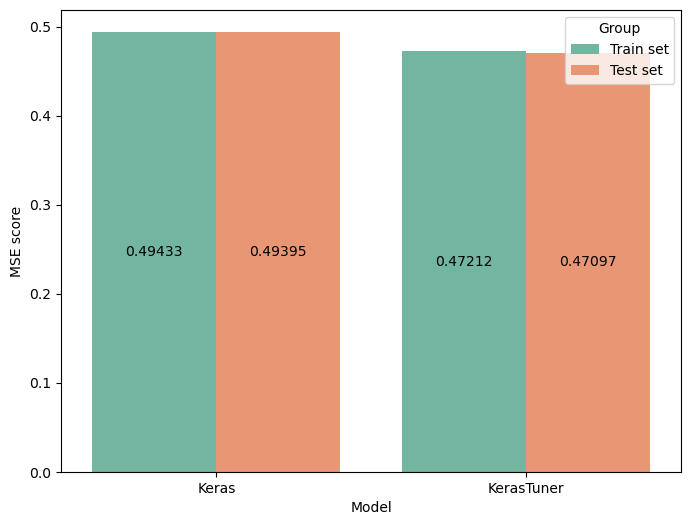

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
data = {
    'Category': ['Keras', 'Keras', 'KerasTuner', 'KerasTuner'],
    'Group': ['Train set', 'Test set', 'Train set', 'Test set'],
    'Value': [keras_loss_train, keras_loss_test, keras_tuner_loss_train, keras_tuner_loss_test, ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a clustered bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Value', hue='Group', data=df, palette='Set2')
plt.xlabel('Model')
plt.ylabel('MSE score')
plt.legend(title='Group')

# Annotate bars with their values
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.5f}', (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', va='center', fontsize=10, color='black')


# Show the plot
plt.show()


In [26]:
df

,Category,Group,Value
0,Keras,Train set,0.494326
1,Keras,Test set,0.493953
2,KerasTuner,Train set,0.472123
3,KerasTuner,Test set,0.470974
